In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
a = np.random.rand(10,10)
a

array([[0.85843607, 0.07725124, 0.48809823, 0.45107357, 0.60209158,
        0.51075375, 0.72662461, 0.71329905, 0.35166875, 0.20535409],
       [0.11503518, 0.90325476, 0.81575505, 0.36214152, 0.01780874,
        0.66543028, 0.49601529, 0.36754839, 0.49321732, 0.18993575],
       [0.39732441, 0.10853327, 0.64014146, 0.311747  , 0.71898489,
        0.01720929, 0.84841974, 0.22682343, 0.95773243, 0.87927992],
       [0.89392561, 0.84932747, 0.53408555, 0.11785308, 0.41227045,
        0.46945649, 0.77131458, 0.08845997, 0.50175086, 0.9659286 ],
       [0.2570941 , 0.52792737, 0.82460403, 0.17693627, 0.53717831,
        0.10347237, 0.82720447, 0.61337643, 0.13749784, 0.34988988],
       [0.20601928, 0.08688848, 0.1532411 , 0.00838335, 0.18556875,
        0.66981666, 0.15955433, 0.63568179, 0.30964706, 0.62896607],
       [0.44428803, 0.8506829 , 0.91483413, 0.01783624, 0.86316407,
        0.98546424, 0.72963977, 0.59403156, 0.60385327, 0.28059243],
       [0.23384699, 0.2073985 , 0.8896773

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 1]])

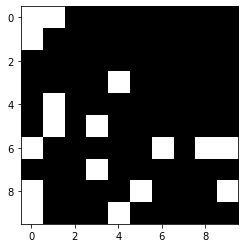

In [160]:
b = (np.random.rand(10,10)<=.8).astype(int)
plt.imshow(b, cmap='binary')
b

In [167]:
b[2,2]=3
b[7,5]=3
b[2,3]=3

In [168]:
G_acnt = np.zeros(b.shape)
G_a = (b > 0).astype(int) # zajímají mě jen Influenced        
for n in range(1,4):
    #kříž
    G_acnt[:,n:] += G_a[:,:-n]
    G_acnt[:,:-n] += G_a[:,n:]
    G_acnt[n:,:] += G_a[:-n,:]
    G_acnt[:-n,:] += G_a[n:,:]
for n in range(1,4):
    for m in range(1,4):
    #šikmo
        G_acnt[n:,m:] += G_a[:-n,:-m]
        G_acnt[n:,:-m] += G_a[:-n,m:]
        G_acnt[:-n,:-m] += G_a[n:,m:]
        G_acnt[:-n,m:] += G_a[n:,:-m]

In [169]:
G_acnt


array([[13., 16., 19., 23., 25., 26., 26., 22., 19., 15.],
       [16., 19., 24., 29., 31., 33., 33., 28., 24., 19.],
       [17., 22., 28., 34., 36., 39., 39., 34., 29., 23.],
       [20., 26., 33., 39., 43., 44., 43., 37., 31., 24.],
       [21., 28., 34., 40., 42., 43., 42., 37., 31., 24.],
       [21., 28., 33., 40., 41., 42., 40., 35., 29., 23.],
       [21., 25., 31., 37., 40., 41., 40., 34., 30., 24.],
       [16., 21., 26., 32., 34., 35., 33., 29., 24., 19.],
       [14., 17., 21., 25., 28., 29., 26., 23., 19., 16.],
       [12., 14., 17., 20., 24., 22., 20., 17., 14., 11.]])

In [174]:
tmpG = np.zeros(b.shape)
G_I = (b == 3).astype(int) # zajímají mě jen Influenced        
for n in range(1,4):
    #kříž
    tmpG[:,n:] += G_I[:,:-n]
    tmpG[:,:-n] += G_I[:,n:]
    tmpG[n:,:] += G_I[:-n,:]
    tmpG[:-n,:] += G_I[n:,:]

    #šikmo
    tmpG[n:,n:] += G_I[:-n,:-n]
    tmpG[n:,:-n] += G_I[:-n,n:]
    tmpG[:-n,:-n] += G_I[n:,n:]
    tmpG[:-n,n:] += G_I[n:,:-n]
tmpG = tmpG / G_acnt
tmpG = np.where(b < 3, tmpG, 0)
tmpG = np.where(b > 0, tmpG, 0)

In [175]:
tmpG

array([[0.        , 0.        , 0.05263158, 0.04347826, 0.04      ,
        0.03846154, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.05263158, 0.08333333, 0.06896552, 0.03225806,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.11764706, 0.09090909, 0.        , 0.        , 0.05555556,
        0.05128205, 0.02564103, 0.        , 0.        , 0.        ],
       [0.        , 0.03846154, 0.06060606, 0.05128205, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.04761905, 0.        , 0.05882353, 0.025     , 0.02380952,
        0.04651163, 0.        , 0.        , 0.03225806, 0.        ],
       [0.04761905, 0.        , 0.03030303, 0.        , 0.        ,
        0.04761905, 0.025     , 0.02857143, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.025     ,
        0.02439024, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.0384615

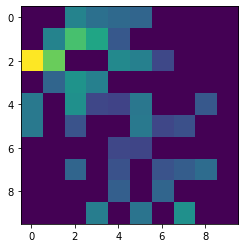

In [176]:
plt.imshow(tmpG)

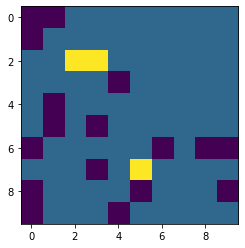

In [177]:
plt.imshow(b)

In [184]:
#treshold
T = np.where(b == 1, np.random.rand(10,10), 0)
print(b)
print(T)
print(tmpG)

[[0 0 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [1 1 3 3 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 1 1 1 1 1]
 [0 1 1 1 1 1 0 1 0 0]
 [1 1 1 0 1 3 1 1 1 1]
 [0 1 1 1 1 0 1 1 1 0]
 [0 1 1 1 0 1 1 1 1 1]]
[[0.         0.         0.38123244 0.48833755 0.6590671  0.07216043
  0.89494099 0.49646091 0.0602872  0.2555436 ]
 [0.         0.03586208 0.16427934 0.65623896 0.16316274 0.63660819
  0.57432205 0.56868034 0.988811   0.13131085]
 [0.9569122  0.29686039 0.         0.         0.56925508 0.95664114
  0.03177404 0.91624395 0.26640388 0.73689738]
 [0.56925891 0.61146262 0.15959881 0.07856017 0.         0.29175541
  0.09317516 0.20295182 0.0490312  0.91014105]
 [0.09654778 0.         0.47082383 0.18258246 0.15268653 0.33975067
  0.71328923 0.80912253 0.2628891  0.24322302]
 [0.05343608 0.         0.23314216 0.         0.20875453 0.02961635
  0.36379732 0.90063032 0.40827627 0.26398181]
 [0.         0.06825558 0.61072633 0.54710575 0.86779186 0.81306978
  0.       

In [198]:
#susceptible --> Influenced 
np.ceil(np.where(b==1, T, 0))#.astype(int)

array([[0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0., 1., 0., 0.],
       [1., 1., 1., 0., 1., 0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0., 1., 1., 1., 1., 1.]])

In [133]:
aa

array([0, 1, 2, 3, 4, 5])

In [139]:
aa[1:-1]

array([1, 2, 3, 4])

In [190]:
np.where(b==2,T,0)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [244]:
aaa = np.random.normal(.2,.1,1000)
aaa = np.where(aaa>=0,aaa,0)
aaa = np.where(aaa<=1,aaa,1)

In [245]:
aaa

array([2.20231230e-01, 9.77975124e-02, 3.45727282e-01, 1.80432916e-01,
       1.74315787e-01, 2.04370055e-01, 2.76767036e-02, 1.13683874e-01,
       1.47981383e-01, 2.99907989e-02, 2.67649016e-01, 3.59221763e-01,
       2.13412356e-01, 1.68059074e-01, 1.04658158e-01, 3.19567714e-01,
       2.35170961e-01, 4.07268951e-01, 3.62920438e-01, 3.02092271e-01,
       2.24866503e-01, 1.77290461e-01, 2.98666175e-01, 1.42444924e-01,
       1.64617230e-01, 2.06621643e-01, 3.88997783e-01, 2.01327512e-01,
       2.60829193e-01, 2.54287941e-01, 1.58535444e-01, 2.90881954e-01,
       3.41877508e-01, 1.87296320e-01, 4.06570026e-01, 3.21755954e-01,
       2.64079221e-01, 2.63185938e-01, 1.89804923e-01, 2.48992741e-01,
       2.06643473e-01, 1.13374322e-01, 2.49399029e-01, 1.80091529e-01,
       2.04422231e-02, 4.43138322e-01, 2.50065358e-01, 3.12965979e-02,
       1.31920753e-01, 2.33707777e-01, 1.58936216e-01, 9.08251318e-02,
       2.10875278e-01, 1.86179303e-01, 5.39784083e-02, 1.84049269e-01,
      

(array([ 61., 106., 147., 176., 211., 147.,  96.,  37.,  16.,   3.]),
 array([0.        , 0.0498902 , 0.09978041, 0.14967061, 0.19956082,
        0.24945102, 0.29934123, 0.34923143, 0.39912164, 0.44901184,
        0.49890205]),
 <BarContainer object of 10 artists>)

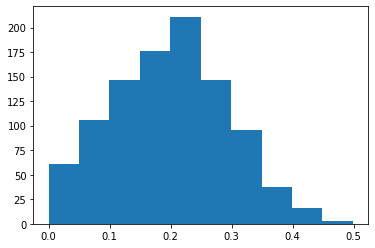

In [246]:
plt.hist(aaa)

In [247]:
np.mean(aaa)

0.19872414036313915

In [248]:
np.average(aaa)

0.19872414036313915

In [249]:
bbb = (.2,.1)
bbb[1]

0.1

In [259]:
ic = [(1,2,3),(3,4,5),(8,7,6)]


In [252]:
if not(ic):
    print('ahoj')

In [261]:
for i in ic:
    print(i[2]+1)

4
6
7


In [257]:
for i in range(1):
    print('a')

a


In [258]:
ic = False
if not(ic):
    print('a')

a


In [267]:
import numpy as np
import ipywidgets as widgets
from abm import wom

model1 = wom(agents=.8, threshold=(.20,.1), net_dim=30)
model1.simulate(iters = 100)

In [269]:
np.count_nonzero(model1.sim[-1]==3)

444

In [271]:
np.count_nonzero(model1.G)

738

In [283]:
from IPython.display import clear_output
import csv

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)


thrs = [(.1,.1), (.15,.1), (.17, .1), (.19, .1), (.195, .1), (.20, .1), (.205, .1), (.21, .1), (.23, .1), (.25, .1), (.30, .1), ]
sim_cnt = 30 
progress = True

net_dim = 50
agents = .8
iters = 200


with open('sim_results.csv', mode='w') as csv_file:
    sim_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sim_writer.writerow(['net_dim','agents','iters','threshold-mean','threshold-var','active'])
    
    runs_cnt = 0
    runs_total = len(thrs)*sim_cnt
    if progress:
        update_progress(0)
    
    for t in thrs:
        for i in range(sim_cnt):
            m = wom(agents=agents, threshold=t, net_dim=net_dim)
            m.simulate(iters = iters)
            
            acnt = np.count_nonzero(m.G)
            active = np.count_nonzero(m.sim[-1]==3)
            
            sim_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            sim_writer.writerow([net_dim, acnt, iters, t[0], t[1], active])
            del m
            runs_cnt += 1

            if progress:
                update_progress(runs_cnt/runs_total)
            
    

Progress: [####################] 100.0%


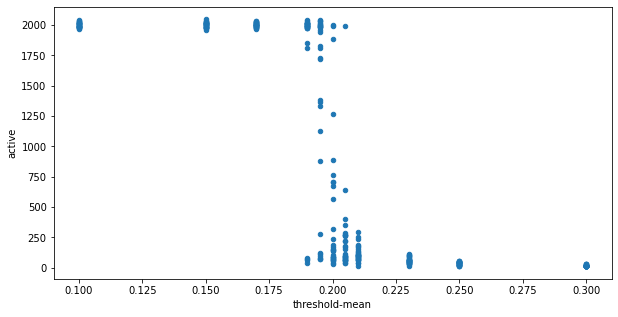

In [285]:
import pandas as pd

sim_df = pd.read_csv('sim_results.csv')
sim_df.plot(kind='scatter', x='threshold-mean', y='active', figsize=(10,5)); # logx=True, 

In [280]:
sim_df.tail()

,net_dim,agents,iters,threshold-mean,threshold-var,active
175,50,1995,150,0.3,0.1,27
176,50,1996,150,0.3,0.1,12
177,50,2022,150,0.3,0.1,13
178,50,1992,150,0.3,0.1,11
179,50,2004,150,0.3,0.1,14


<AxesSubplot:xlabel='threshold-mean', ylabel='active'>

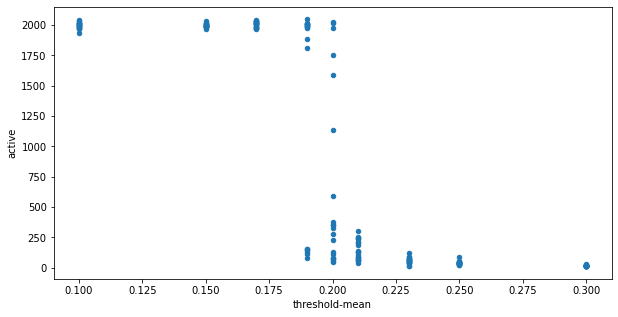